## importing necessery librarie

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [84]:
airbnb = pd.read_csv("airbnb.csv")

In [85]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [86]:
airbnb.shape

(48895, 16)

In [87]:
airbnb.size

782320

In [88]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Data Cleaning

In [89]:
# Check null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [90]:
# drop 'id' & 'host_name' as these features are irrelevant for our prediction
# drop 'last_review' due to large amounts of missing values and this feature is less valuable for our predictions

airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [91]:
airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [92]:
# there are lots of missing values nearly ~10,052 in reviews_per_month,
# but the feature may still have some valuable insights
# so replacing all NaN values in 'reviews_per_month' with 0

airbnb.fillna({'reviews_per_month' : 0}, inplace=True)
airbnb.isnull().sum()


name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

## Exploring and Visualising Data

In [93]:
# Train test split - data
from sklearn.model_selection import train_test_split

# Split the dataset into 80% train and 20% test 

train_data, test_data = train_test_split(airbnb, test_size = 0.2, train_size = 0.8, random_state = 123)

In [94]:
train_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,6.745599e+07,40.728990,-73.952224,152.431000,7.028965,23.312762,1.092198,7.107041,112.711167
std,7.860329e+07,0.054456,0.046121,237.950146,20.826066,44.763405,1.611421,32.952899,131.479113
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.764177e+06,40.690038,-73.983120,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.073777e+07,40.722970,-73.955660,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763180,-73.936450,175.000000,5.000000,23.000000,1.580000,2.000000,226.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [95]:
# describe categorical data
train_data.describe(include=['O'])

,name,neighbourhood_group,neighbourhood,room_type
count,39104,39116,39116,39116
unique,38439,5,220,3
top,Home away from home,Manhattan,Williamsburg,Entire home/apt
freq,14,17342,3138,20322


In [96]:
# examining the unique values of neighbourhood group 
train_data.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        17342
Brooklyn         16114
Queens            4502
Bronx              868
Staten Island      290
Name: count, dtype: int64

In [97]:
#examining the unique values of neighbourhood, show top 5
# 220 unique negihbourhoods in total
train_data.neighbourhood.value_counts()[:5]

neighbourhood
Williamsburg          3138
Bedford-Stuyvesant    2985
Harlem                2140
Bushwick              1970
Upper West Side       1611
Name: count, dtype: int64

In [98]:
# unique values of room_type 
train_data.room_type.value_counts()

room_type
Entire home/apt    20322
Private room       17862
Shared room          932
Name: count, dtype: int64

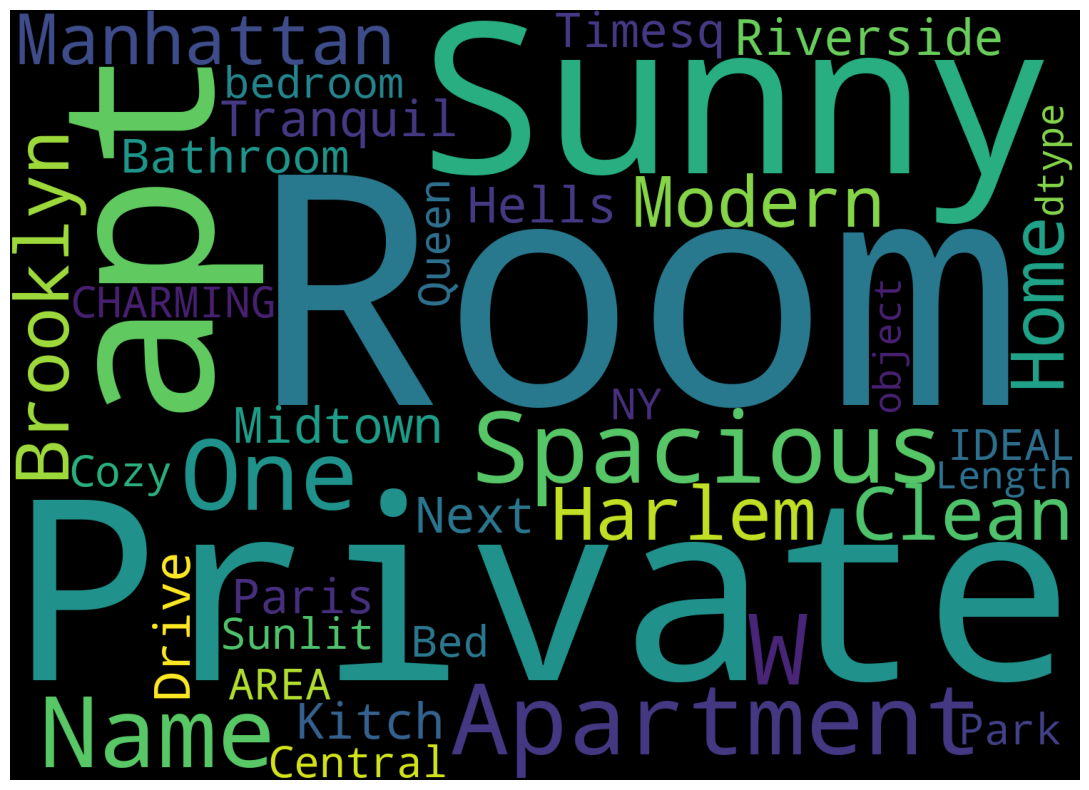

In [99]:
# create a wordcloud plot showing the most popular words in the name (description of the listing)
from wordcloud import WordCloud
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=1500,
                          height=1080
                         ).generate(str(train_data.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [100]:
df = airbnb.drop(['name','host_id'], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [101]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [102]:
# check for null values
train_data.isnull().sum()

name                              12
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [103]:
categorical_features = df.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

numerical_features =  df.select_dtypes(exclude=['object'])
numerical_features = numerical_features.drop(['price'], axis=1)

X = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

Categorical features: (48895, 3)


In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#X = df.drop(columns=["price"])
y = df["price"]

from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
9601,40.70178,-73.92829,4,1,0.02,1,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
45574,40.81157,-73.94654,3,0,0.00,1,51,False,False,True,...,False,False,False,False,False,False,False,True,False,False
33996,40.79485,-73.97550,3,28,3.31,1,158,False,False,True,...,False,False,False,False,False,False,False,True,False,False
11829,40.75997,-73.99265,2,0,0.00,1,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
41134,40.67818,-73.92284,1,3,0.58,2,0,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [105]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

y_predict=tree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.9709984617792446

In [106]:
result = pd.DataFrame({'Actual': y_test, 
                   'Predicted': y_predict})
result.head(30)

,Actual,Predicted
29122,35,110.0
2964,85,111.0
14184,55,45.0
1174,99,100.0
42853,75,55.0
12409,289,300.0
22622,125,265.0
23384,225,96.0
15294,65,100.0
22143,116,125.0


In [107]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

print('MAE: %f'% mean_absolute_error(y_test, y_predict))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_predict)))   
print('R2 %f' % r2_score(y_test, y_predict))

MAE: 87.019429
RMSE: 349.255894
R2 -0.970998


## Linear Regression

In [108]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train, y_train)

0.11935511086713668

In [110]:
# perform a robust scaler transform of the dataset
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train);
X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)
X_train_imp
X_train_imp_df = pd.DataFrame(X_train_imp, columns = X_train.columns, index = X_train.index)
X_train_imp_df.head()
scaler = StandardScaler()
X_train_scaled_std = scaler.fit_transform(X_train_imp)
X_test_scaled_std = scaler.transform(X_test_imp)
pd.DataFrame(X_train_scaled_std, columns=X_train.columns, index=X_train.index)
#USe a Linear Regression Model to fit the training data
reg.fit(X_train_scaled_std,y_train)
reg.score(X_train_scaled_std, y_train) 

0.11935511086713657